In [1]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data_A = pd.read_csv("current_csv_files/data_A.csv")

data_A_train = data_A[data_A['est'] == 0]
data_A_val = data_A[data_A['est'] == 1]

In [3]:
X_data_A_train = data_A_train
y_data_A_train = X_data_A_train.pop('target')

X_data_A_val = data_A_val
y_data_A_val = X_data_A_val.pop('target')


In [4]:
# Convert 'date_forecast' to datetime and set as index
data_A['date_forecast'] = pd.to_datetime(data_A['date_forecast'])
data_A.set_index('date_forecast', inplace=True)

# Sort the dataframe by date
data_A.sort_index(inplace=True)

In [5]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller, acf, pacf
from sklearn.metrics import mean_squared_error
from itertools import product

In [6]:
# Select the exogenous variables
exog_vars = ['direct_rad:W', 'diffuse_rad:W']
exog_data = data_A[exog_vars]

In [18]:

"""
# Split the data into training and test sets (80% train, 20% test)
split_point = int(0.8 * len(data_A))
train, test = data_A.iloc[:split_point], data_A.iloc[split_point:]
exog_train, exog_test = exog_data.iloc[:split_point], exog_data.iloc[split_point:]

# Fit the SARIMAX model
sarimax_model = SARIMAX(train['target'],
                        exog=exog_train,
                        order=(1, 1, 1),
                        seasonal_order=(2, 1, 1, 24))

sarimax_results = sarimax_model.fit()

# Summary of the model
model_summary = sarimax_results.summary()
model_summary
"""

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.50304D+00    |proj g|=  5.83153D-02

At iterate    5    f=  7.46150D+00    |proj g|=  2.99605D-02

At iterate   10    f=  7.44213D+00    |proj g|=  6.05616D-03

At iterate   15    f=  7.43721D+00    |proj g|=  9.45437D-03

At iterate   20    f=  7.43539D+00    |proj g|=  7.03786D-03

At iterate   25    f=  7.43268D+00    |proj g|=  2.78527D-03

At iterate   30    f=  7.43236D+00    |proj g|=  6.43357D-03

At iterate   35    f=  7.42924D+00    |proj g|=  4.59951D-02

At iterate   40    f=  7.42338D+00    |proj g|=  7.01210D-03

At iterate   45    f=  7.38705D+00    |proj g|=  2.87267D-02
  ys=-4.987E-02  -gs= 3.205E-02 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   50    f=  7.35382D+00    |proj g|=  9.64869D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     98      2     1     0   9.649D-03   7.354D+00
  F =   7.3538220782853037     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                             target   No. Observations:                26564
Model:             SARIMAX(1, 1, 1)x(2, 1, 1, 24)   Log Likelihood             -195346.930
Date:                            Tue, 07 Nov 2023   AIC                         390709.859
Time:                                    17:16:17   BIC                         390775.350
Sample:                                         0   HQIC                        390730.996
                                          - 26564                                         
Covariance Type:                              opg                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
direct_rad:W      5.6557      0.040    141.376      0.000       5.577       5.734
diffuse_rad:W     8.6043      0.082    104.972      0.000       8.444       8.765
ar.L1             0.6762      0.003    213.481      0.000       0.670       0.682
ma.L1            -1.0000      0.001  -1170.519      0.000      -1.002      -0.998
ar.S.L24          0.0391      0.004      9.126      0.000       0.031       0.047
ar.S.L48          0.0395      0.004      9.157      0.000       0.031       0.048
ma.S.L24         -1.0000      0.021    -48.119      0.000      -1.041      -0.959
sigma2         1.826e+05   3797.497     48.093      0.000    1.75e+05     1.9e+05
===================================================================================
Ljung-Box (L1) (Q):                  22.83   Jarque-Bera (JB):            130339.86
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.10   Skew:                             0.01
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [7]:
from pmdarima import auto_arima

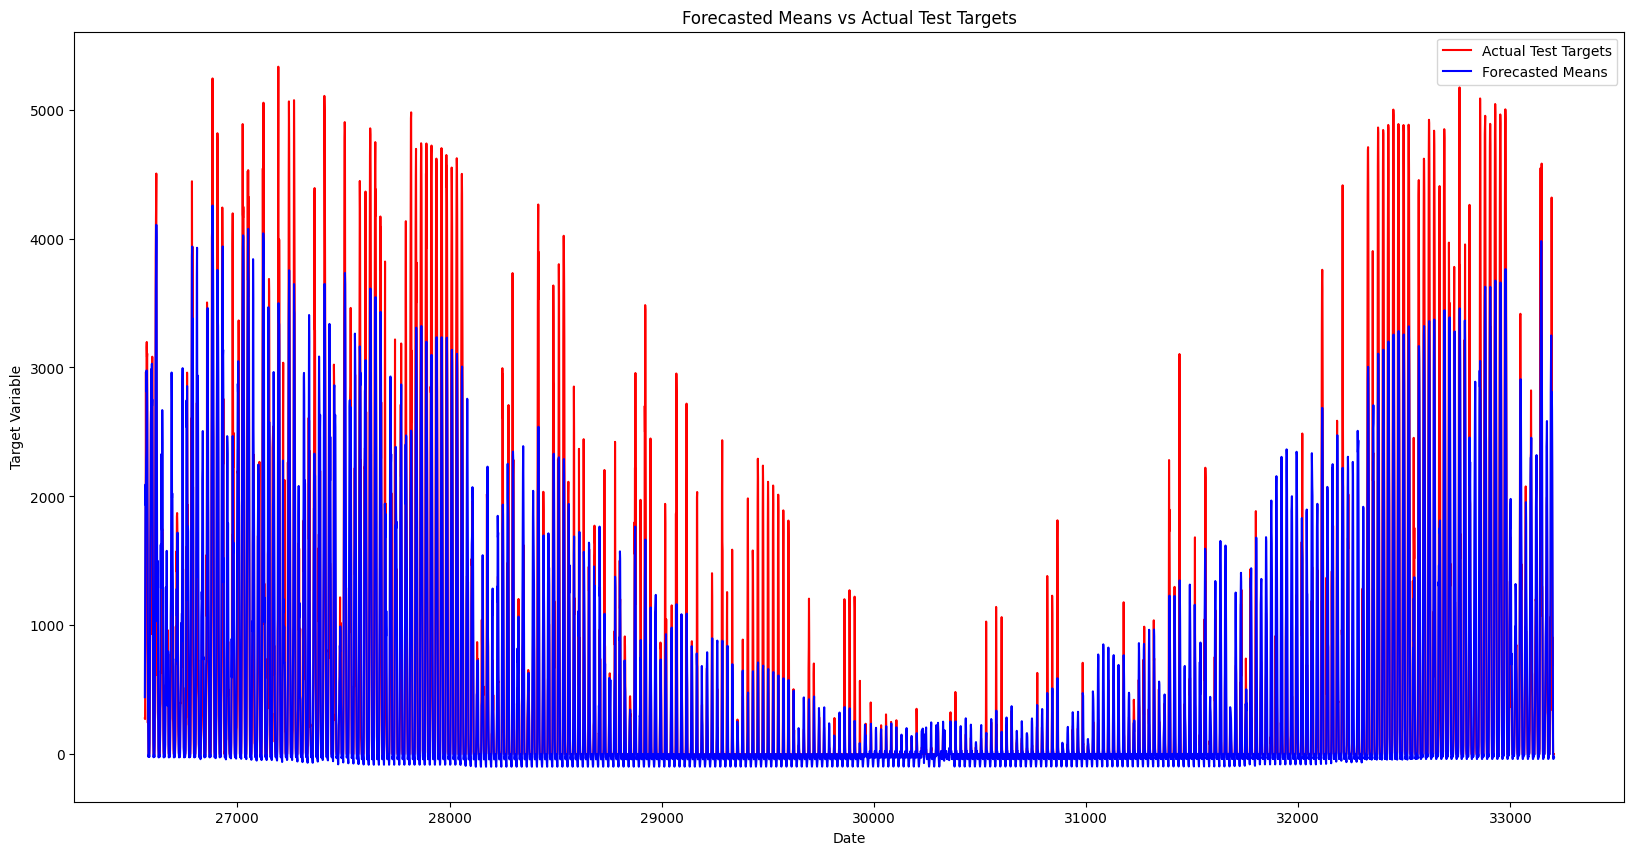

In [30]:
import matplotlib.pyplot as plt

# Assuming 'forecast_mean' is your predicted mean forecast from the SARIMAX model
# And 'test_targets' is a pandas Series of your actual test target values

plt.figure(figsize=(20, 10))


# Plot the actual test targets
plt.plot(forecast_mean.index, test['target'], color='red', label='Actual Test Targets')

# Plot the forecasted means
plt.plot(forecast_mean.index, forecast_mean, color='blue', label='Forecasted Means')

# Customizing the plot
plt.title('Forecasted Means vs Actual Test Targets')
plt.xlabel('Date')
plt.ylabel('Target Variable')
plt.legend()
plt.show()


In [12]:
# Assuming 'train' is your training dataset and 'train_exog' are the exogenous variables
model = auto_arima(data_A['target'].iloc[-3000:], exogenous=data_A[exog_vars].iloc[-3000:],
                   start_p=0, start_q=0,
                   max_p=3, max_q=3, m=24,
                   start_P=0, seasonal=True,
                   d=None, D=1, trace=True,
                   error_action='ignore',  
                   suppress_warnings=True, 
                   stepwise=True)

print(model.summary())


Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,1,1)[24] intercept   : AIC=45918.563, Time=11.29 sec
 ARIMA(0,0,0)(0,1,0)[24] intercept   : AIC=46620.560, Time=0.27 sec
 ARIMA(1,0,0)(1,1,0)[24] intercept   : AIC=42770.956, Time=19.77 sec
 ARIMA(0,0,1)(0,1,1)[24] intercept   : AIC=43583.754, Time=25.77 sec
 ARIMA(0,0,0)(0,1,0)[24]             : AIC=46618.901, Time=0.16 sec
 ARIMA(1,0,0)(0,1,0)[24] intercept   : AIC=43430.650, Time=0.46 sec
 ARIMA(1,0,0)(2,1,0)[24] intercept   : AIC=42456.833, Time=125.71 sec
 ARIMA(1,0,0)(2,1,1)[24] intercept   : AIC=inf, Time=211.32 sec
 ARIMA(1,0,0)(1,1,1)[24] intercept   : AIC=inf, Time=31.58 sec
 ARIMA(0,0,0)(2,1,0)[24] intercept   : AIC=46023.616, Time=62.33 sec
 ARIMA(2,0,0)(2,1,0)[24] intercept   : AIC=42366.850, Time=105.60 sec
 ARIMA(2,0,0)(1,1,0)[24] intercept   : AIC=42686.438, Time=20.34 sec
 ARIMA(2,0,0)(2,1,1)[24] intercept   : AIC=inf, Time=163.60 sec
 ARIMA(2,0,0)(1,1,1)[24] intercept   : AIC=inf, Time=39.65 sec
 ARIMA(3,0,0)(

: 

In [8]:
model2 = auto_arima(data_A['target'].iloc[-3000:], exogenous=data_A[exog_vars].iloc[-3000:],
                   start_p=2, start_q=2,
                   max_p=3, max_q=3, m=24,
                   start_P=2, seasonal=True,
                   d=None, D=1, trace=True,
                   error_action='ignore',  
                   suppress_warnings=True, 
                   stepwise=True)

print(model2.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(2,1,1)[24] intercept   : AIC=inf, Time=255.09 sec
 ARIMA(0,0,0)(0,1,0)[24] intercept   : AIC=46620.560, Time=0.24 sec
 ARIMA(1,0,0)(1,1,0)[24] intercept   : AIC=42770.956, Time=15.18 sec
 ARIMA(0,0,1)(0,1,1)[24] intercept   : AIC=43583.754, Time=21.52 sec
 ARIMA(0,0,0)(0,1,0)[24]             : AIC=46618.901, Time=0.18 sec
 ARIMA(1,0,0)(0,1,0)[24] intercept   : AIC=43430.650, Time=0.45 sec
 ARIMA(1,0,0)(2,1,0)[24] intercept   : AIC=42456.833, Time=78.56 sec
 ARIMA(1,0,0)(2,1,1)[24] intercept   : AIC=inf, Time=137.49 sec
 ARIMA(1,0,0)(1,1,1)[24] intercept   : AIC=inf, Time=28.19 sec
 ARIMA(0,0,0)(2,1,0)[24] intercept   : AIC=46023.616, Time=46.08 sec
 ARIMA(2,0,0)(2,1,0)[24] intercept   : AIC=42366.850, Time=88.05 sec
 ARIMA(2,0,0)(1,1,0)[24] intercept   : AIC=42686.438, Time=17.72 sec
 ARIMA(2,0,0)(2,1,1)[24] intercept   : AIC=inf, Time=155.00 sec
 ARIMA(2,0,0)(1,1,1)[24] intercept   : AIC=inf, Time=40.47 sec
 ARIMA(3,0,0)(2,1,0)[

KeyboardInterrupt: 

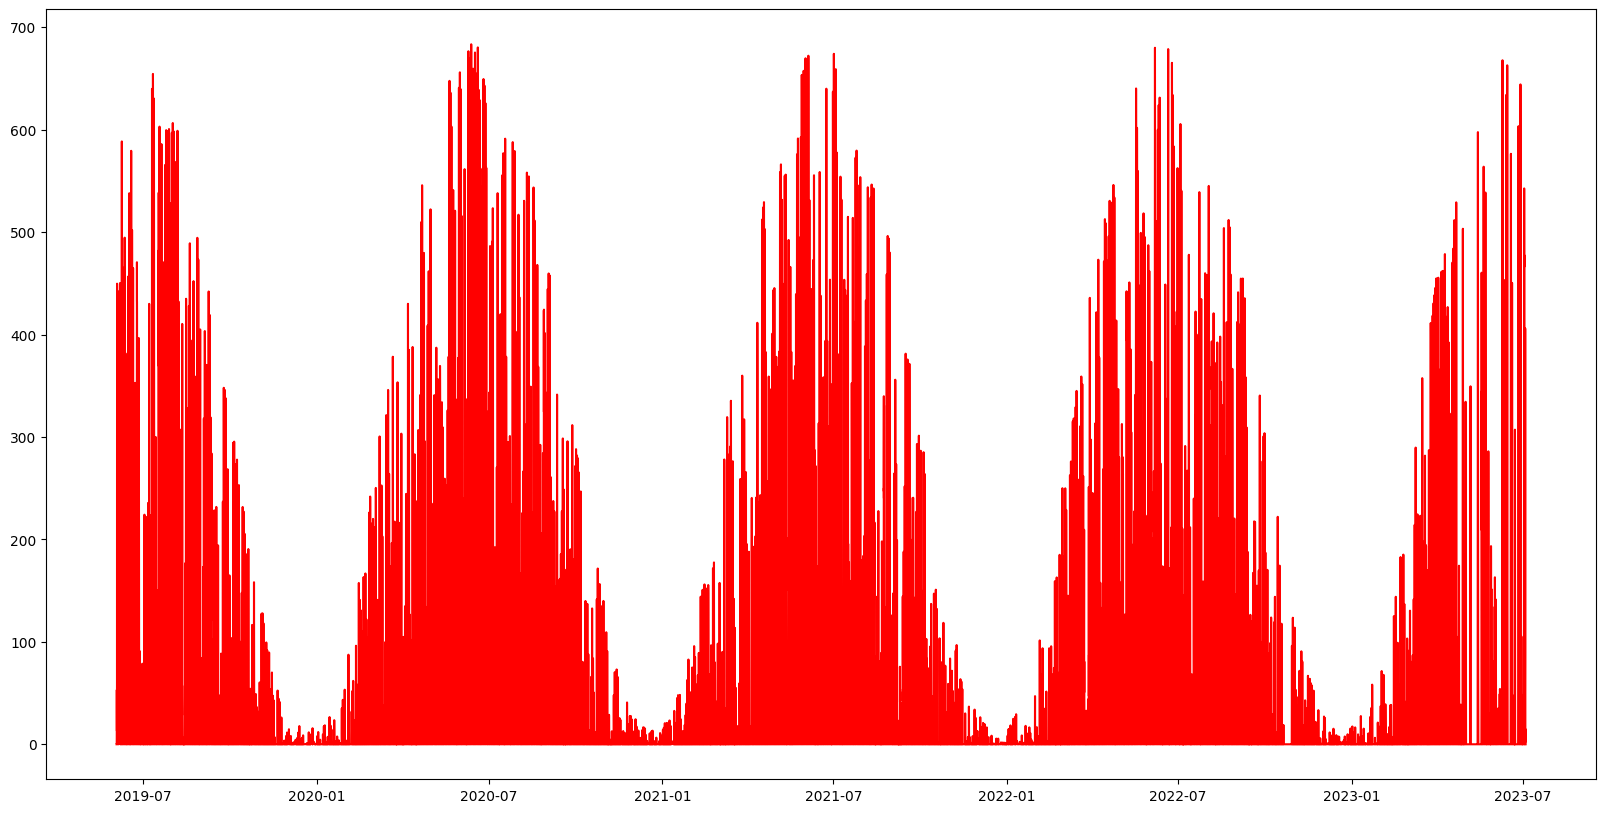

In [8]:
# Get test data
test_A = pd.read_csv("current_csv_files/test_A.csv")

# Convert 'date_forecast' to datetime and set as index
test_A['date_forecast'] = pd.to_datetime(test_A['date_forecast'])
test_A.set_index('date_forecast', inplace=True)

All_A = pd.concat([data_A, test_A])

plt.figure(figsize=(20, 10))
plt.plot(All_A['direct_rad:W'], color='red', label='test_all')


In [55]:
forecast_results_all = sarimax_results.get_forecast(steps=len(All_A), exog=All_A[exog_vars])
forecast_mean_all = forecast_results_all.predicted_mean


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [56]:
forecast__all = forecast_results_all.prediction_results
forecast__all

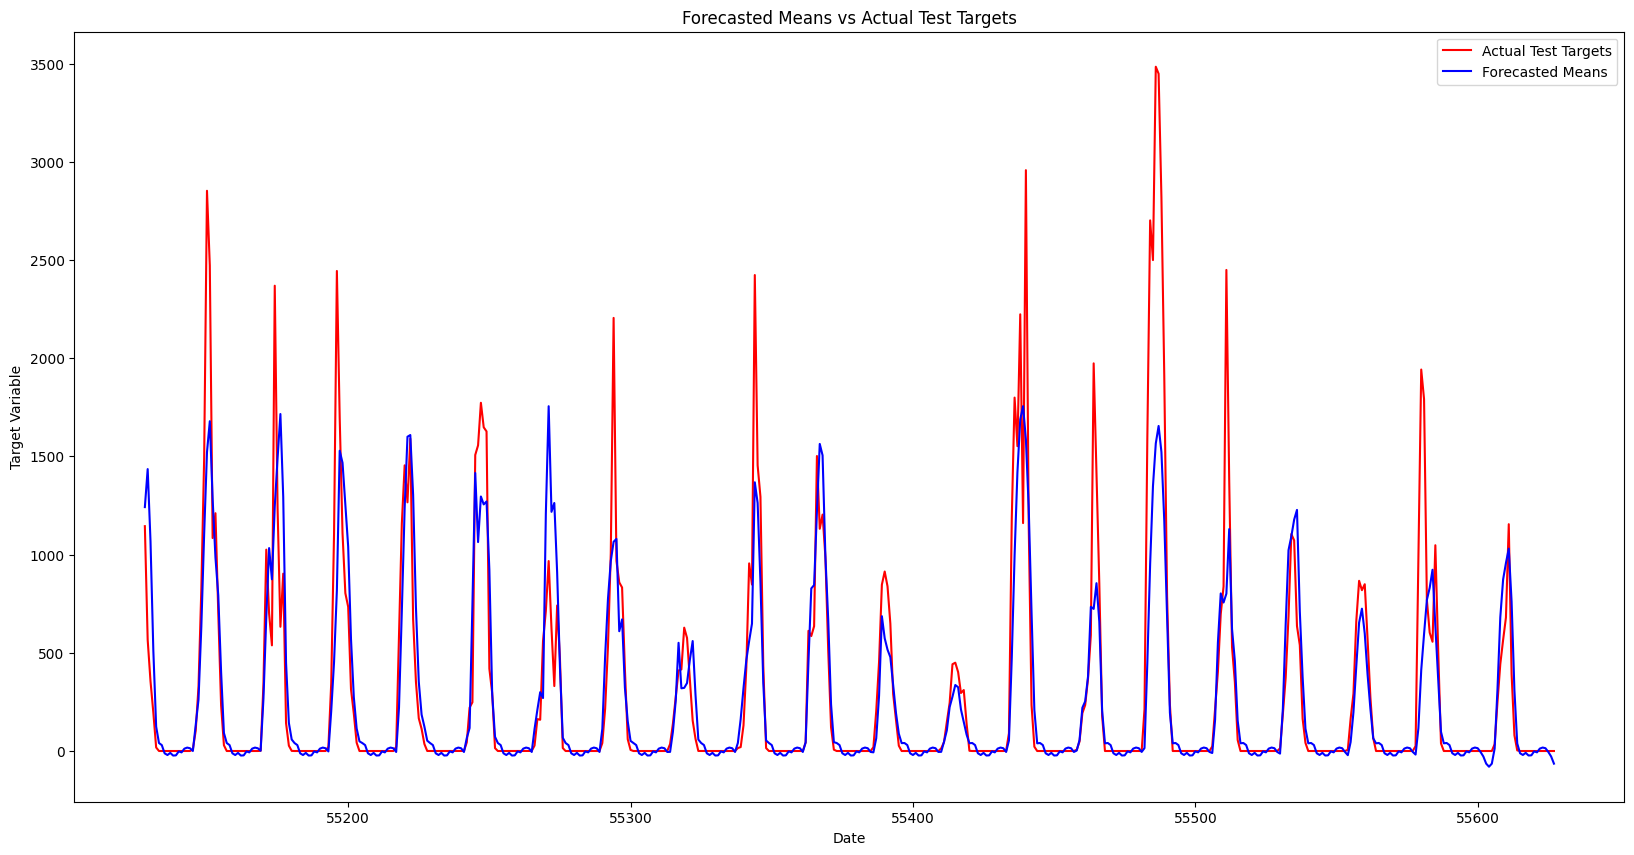

In [54]:

N = 2000
start = N + 26564
end = start + 500

plt.figure(figsize=(20, 10))

# Plot the actual test targets
plt.plot(forecast_mean_all.iloc[start:end].index, All_A['target'].iloc[start:end], color='red', label='Actual Test Targets')

# Plot the forecasted means
plt.plot(forecast_mean_all.iloc[start:end].index, forecast_mean_all.iloc[start:end], color='blue', label='Forecasted Means')



# Customizing the plot
plt.title('Forecasted Means vs Actual Test Targets')
plt.xlabel('Date')
plt.ylabel('Target Variable')
plt.legend()
plt.show()

In [9]:
# Fit the SARIMAX model to full dataset
exog_vars = ['direct_rad:W', 'diffuse_rad:W']

sarimax_model = SARIMAX(data_A['target'],
                        exog=data_A[exog_vars],
                        order=(1, 0, 1),
                        seasonal_order=(2, 1, 1, 24))

sarimax_results = sarimax_model.fit()

# Summary of the model
model_summary = sarimax_results.summary()
model_summary

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.43863D+00    |proj g|=  5.55984D-02


 This problem is unconstrained.


KeyboardInterrupt: 

In [24]:
data_A.dtypes

target                            float64
absolute_humidity_2m:gm3          float64
air_density_2m:kgm3               float64
clear_sky_energy_1h:J             float64
clear_sky_rad:W                   float64
dew_or_rime:idx                   float64
dew_point_2m:K                    float64
diffuse_rad:W                     float64
diffuse_rad_1h:J                  float64
direct_rad:W                      float64
direct_rad_1h:J                   float64
effective_cloud_cover:p           float64
elevation:m                       float64
fresh_snow_12h:cm                 float64
fresh_snow_1h:cm                  float64
fresh_snow_24h:cm                 float64
fresh_snow_3h:cm                  float64
fresh_snow_6h:cm                  float64
is_day:idx                        float64
is_in_shadow:idx                  float64
msl_pressure:hPa                  float64
precip_5min:mm                    float64
precip_type_5min:idx              float64
pressure_100m:hPa                 

In [29]:
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Assuming you have a DataFrame 'df' with a 'target' column and potential exogenous variables
df = data_A.iloc[:4000]

best_aic = float('inf')
best_model = None
best_exog_vars = []

exog_vars = ['direct_rad:W', 'direct_rad_1h:J', 'sun_azimuth:d', 'direct_rad:W', 'wind_speed_10m:ms', 'day_year', 'clear_sky_rad:W', 'sun_elevation:d']

for var in exog_vars:
    try:
        # Fit SARIMA model with the current set of exogenous variables
        model = SARIMAX(df['target'], exog=df[best_exog_vars + [var]], order=(1, 0, 0), seasonal_order=(1, 0, 0, 24))
        results = model.fit(disp=False, method_kwargs={"warn_convergence": False})
        print(var,': ',results.aic)
        
        # Check if the AIC has improved
        if results.aic < best_aic:
            best_aic = results.aic
            best_model = results
            best_exog_vars.append(var)
            print(f"Added {var}, AIC: {best_aic}")
    except Exception as e:
        print(f"Error with variable {var}: {e}")

# 'best_model' now contains the SARIMA model with the selected exogenous variables


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: method_kwargs. Afte

direct_rad:W :  59422.161479676484
Added direct_rad:W, AIC: 59422.161479676484


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: method_kwargs. Afte

direct_rad_1h:J :  60080.5851430177


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: method_kwargs. Afte

sun_azimuth:d :  59406.58953212788
Added sun_azimuth:d, AIC: 59406.58953212788


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: method_kwargs. Afte

direct_rad:W :  59918.088690925695


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: method_kwargs. Afte

wind_speed_10m:ms :  59391.47265337421
Added wind_speed_10m:ms, AIC: 59391.47265337421


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: method_kwargs. Afte

day_year :  59335.06184009992
Added day_year, AIC: 59335.06184009992


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: method_kwargs. Afte

clear_sky_rad:W :  58707.52530266062
Added clear_sky_rad:W, AIC: 58707.52530266062


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: method_kwargs. Afte

sun_elevation:d :  58713.28279214814


In [63]:
# Fit the SARIMAX model to full dataset

sarimax_model = SARIMAX(data_A['target'], exog=data_A[best_exog_vars], order=(2, 0, 1), seasonal_order=(1, 1, 0, 24))

sarimax_results = sarimax_model.fit()

# Summary of the model
model_summary = sarimax_results.summary()
model_summary

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.49546D+00    |proj g|=  1.37888D-02

At iterate    5    f=  7.49236D+00    |proj g|=  2.58499D-02

At iterate   10    f=  7.48774D+00    |proj g|=  5.28457D-04

At iterate   15    f=  7.48765D+00    |proj g|=  4.44086D-03

At iterate   20    f=  7.48188D+00    |proj g|=  2.56840D-02

At iterate   25    f=  7.47725D+00    |proj g|=  1.68068D-02

At iterate   30    f=  7.47216D+00    |proj g|=  8.82503D-03

At iterate   35    f=  7.47056D+00    |proj g|=  8.43278D-03

At iterate   40    f=  7.46593D+00    |proj g|=  2.47401D-03

At iterate   45    f=  7.46502D+00    |proj g|=  9.42131D-03


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  7.46240D+00    |proj g|=  4.36699D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     55      1     0     0   4.367D-03   7.462D+00
  F =   7.4623985531555119     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                              target   No. Observations:                33206
Model:             SARIMAX(2, 0, 1)x(1, 1, [], 24)   Log Likelihood             -247796.406
Date:                             Tue, 07 Nov 2023   AIC                         495612.813
Time:                                     21:54:59   BIC                         495696.910
Sample:                                          0   HQIC                        495639.668
                                           - 33206                                         
Covariance Type:                               opg                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
direct_rad:W          3.8931      0.029    133.939      0.000       3.836       3.950
sun_azimuth:d         0.2488      0.862      0.289      0.773      -1.441       1.939
wind_speed_10m:ms   -19.7585      2.694     -7.335      0.000     -25.039     -14.479
day_year              1.7268      1.312      1.316      0.188      -0.844       4.298
clear_sky_rad:W       6.1215      0.170     36.049      0.000       5.789       6.454
ar.L1                -0.3118      0.002   -138.293      0.000      -0.316      -0.307
ar.L2                 0.6474      0.002    283.030      0.000       0.643       0.652
ma.L1                 0.9975      0.001   1249.085      0.000       0.996       0.999
ar.S.L24             -0.4975      0.002   -224.785      0.000      -0.502      -0.493
sigma2             1.721e+05    524.318    328.261      0.000    1.71e+05    1.73e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.91   Jarque-Bera (JB):            176359.92
Prob(Q):                              0.34   Prob(JB):                         0.00
Heteroskedasticity (H):               0.80   Skew:                             0.21
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [32]:
best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                             target   No. Observations:                 4000
Model:             SARIMAX(1, 0, 0)x(1, 0, 0, 24)   Log Likelihood              -29345.763
Date:                            Tue, 07 Nov 2023   AIC                          58707.525
Time:                                    21:18:27   BIC                          58757.878
Sample:                                         0   HQIC                         58725.374
                                           - 4000                                         
Covariance Type:                              opg                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
direct_rad:W          3.6456      0.094     38.872      0.000       3.462       3.829
sun_azimuth:d         0.1344      0.471      0.285      0.775      -0.789       1.058
wind_speed_10m:ms   -12.2933     10.637     -1.156      0.248     -33.141       8.554
day_year             -0.2636      0.506     -0.521      0.603      -1.256       0.729
clear_sky_rad:W       2.6732      0.113     23.603      0.000       2.451       2.895
ar.L1                 0.7931      0.007    111.347      0.000       0.779       0.807
ar.S.L24              0.0827      0.010      8.620      0.000       0.064       0.101
sigma2             1.373e+05   1499.271     91.559      0.000    1.34e+05     1.4e+05
===================================================================================
Ljung-Box (L1) (Q):                  50.81   Jarque-Bera (JB):             10697.06
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.48   Skew:                             0.36
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

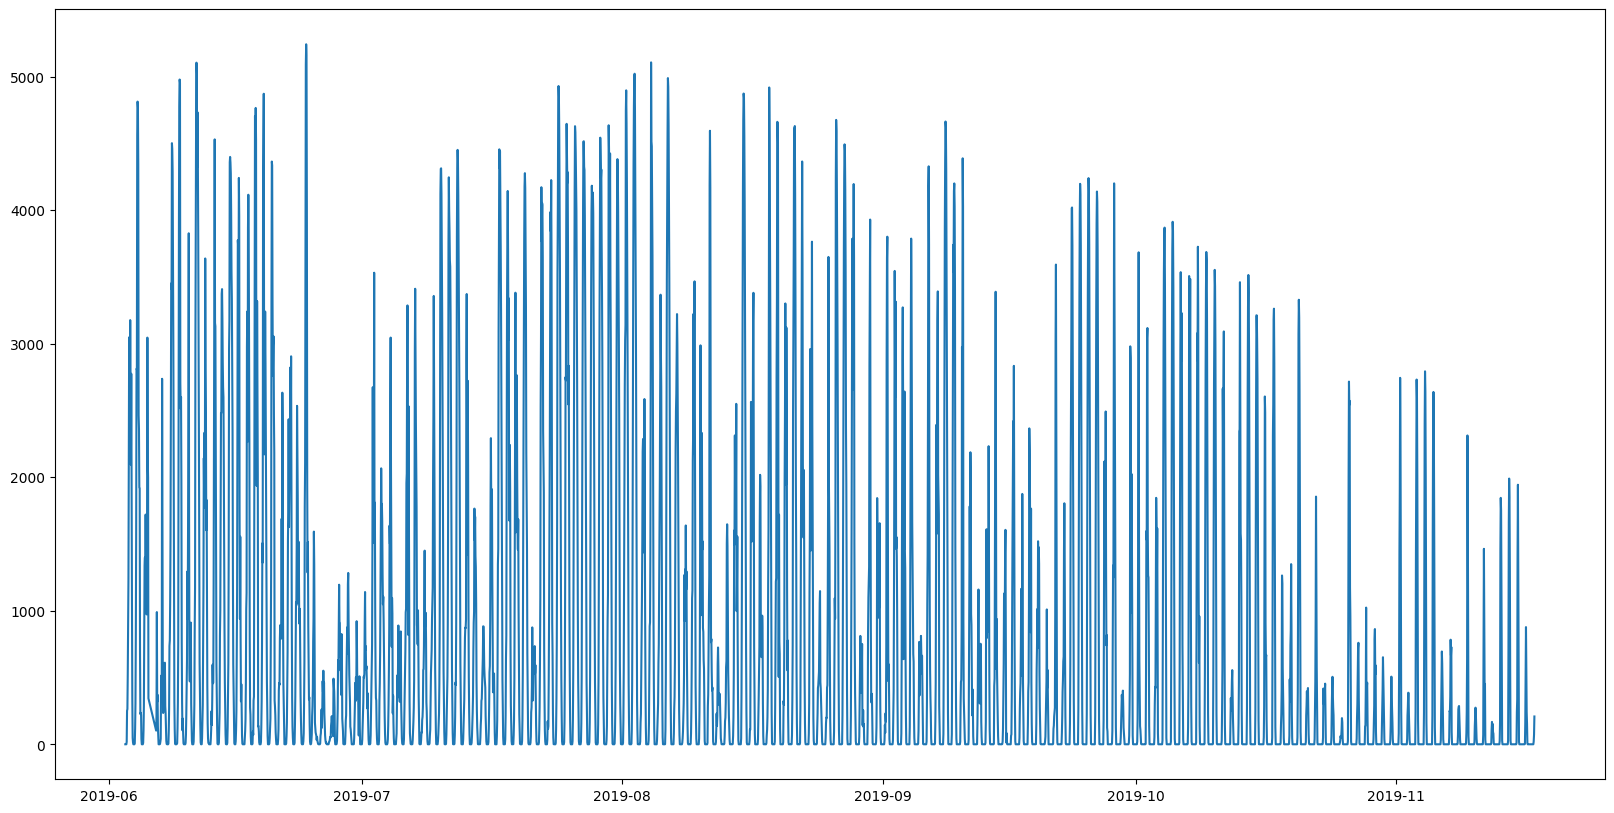

In [15]:
plt.figure(figsize=(20, 10))
plt.plot(data_A.iloc[:4000].index, data_A.iloc[:4000]['target'])

In [54]:
best_result = best_model.get_forecast(steps=len(All_A), exog=All_A[best_exog_vars])
best_mean = best_result.predicted_mean
best_mean_clip = best_mean.clip(lower=0)
best_conf = best_result.conf_int()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [51]:
best_conf

,lower target,upper target
4000,-837.322876,615.015491
4001,-1070.600350,783.019224
4002,-1175.975742,890.487822
4003,-1230.988940,958.768919
4004,-1200.324013,1063.541695
...,...,...
37921,-1005.261122,1387.905980
37922,-1200.705157,1192.461944
37923,-1276.278320,1116.888782
37924,-1273.857674,1119.309427


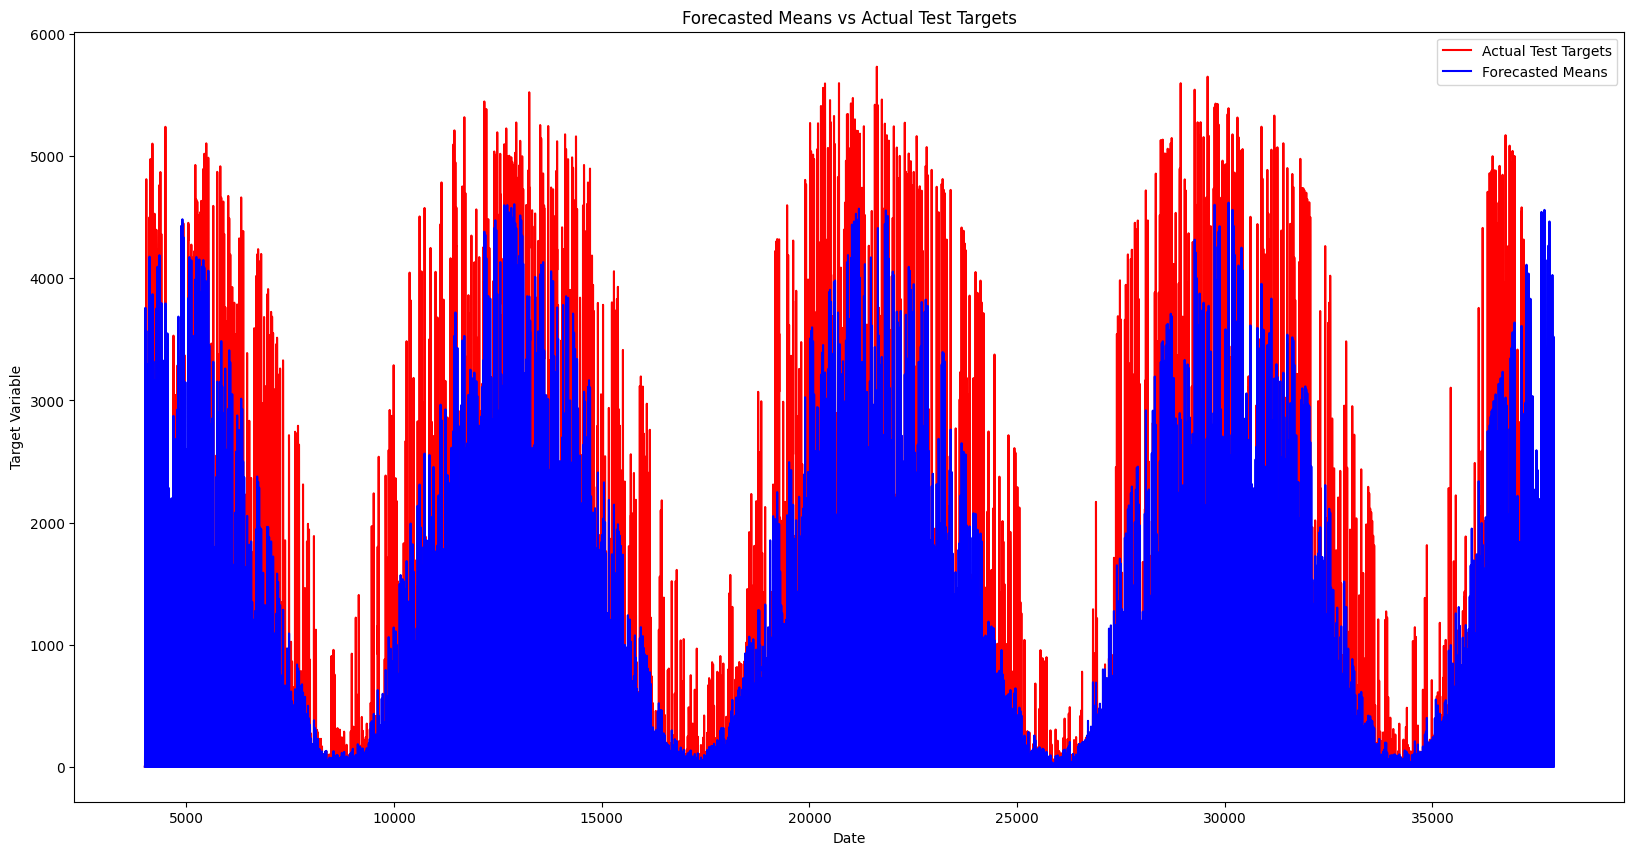

In [62]:
plt.figure(figsize=(20, 10))

"""
N = 0
start = N + 0
end = start + 10000

# Plot the actual test targets
plt.plot(best_mean.iloc[start:end].index, All_A.iloc[start:end]['target'], color='red', label='Actual Test Targets')

# Plot the forecasted means
plt.plot(best_mean.iloc[start:end].index, best_mean.iloc[start:end], color='blue', label='Forecasted Means')
"""

plt.plot(best_mean_clip.index, All_A['target'], color='red', label='Actual Test Targets')

plt.plot(best_mean_clip.index, best_mean_clip, color='blue', label='Forecasted Means')


# Plot the confidence intervals
"""
plt.fill_between(best_mean.index, 
                 best_conf.iloc[:, 0], 
                 best_conf.iloc[:, 1], color='pink', alpha=0.3, label='Confidence Interval')
"""




# Customizing the plot
plt.title('Forecasted Means vs Actual Test Targets')
plt.xlabel('Date')
plt.ylabel('Target Variable')
plt.legend()
plt.show()

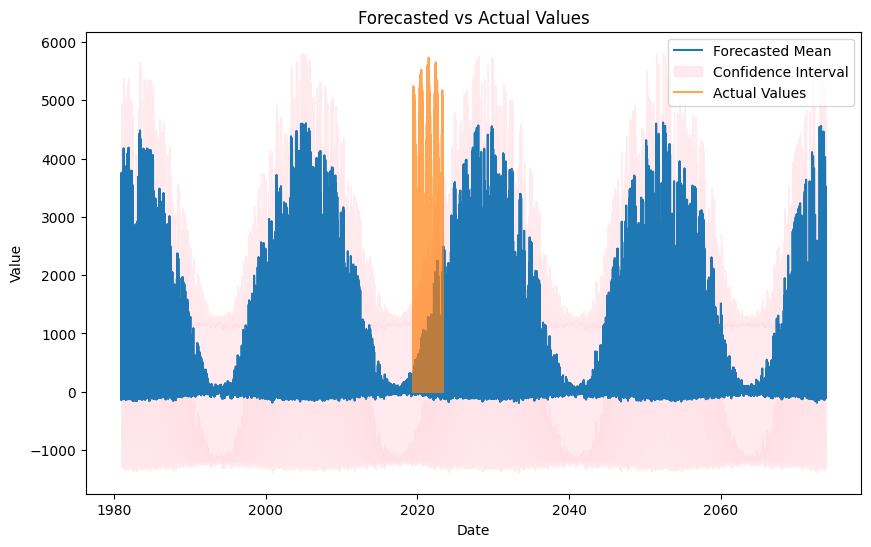

In [52]:
plt.figure(figsize=(10, 6))

# Plot the forecasted mean
plt.plot(best_mean.index, best_mean, label='Forecasted Mean')

# Plot the confidence intervals
plt.fill_between(best_conf.index, 
                 best_conf.iloc[:, 0], 
                 best_conf.iloc[:, 1], color='pink', alpha=0.3, label='Confidence Interval')

# Plot the actual values
plt.plot(All_A['target'].index, All_A['target'], label='Actual Values', alpha=0.7)

# Customize the plot
plt.title('Forecasted vs Actual Values')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [ ]:
# to csv
best_mean_clip.to_csv("current_csv_files/A_SARIMA_")